Michael Bernard

CPSC222

May 5, 2022

Description: Final Project

# Introduction

In this project I will be analyzing my data from the Health app on my iPhone as well as Spokane, WA weather data to see if there is any correlation between the two. Additionally, I will be taking a close look at the data to see if the day of the week effects my walking patterns.

* __1.a__- This project is important to me because I try to prioritize my health and I feel as though I sometimes have slumps where I do not move as much as I should. I also feel that the weather has an effect on my motivation which causes me to stay in my room more.

* __1.b__- Both sets of data that I will be using are in the form of CSV files.

* __1.c__- There are two tables of data coming from two different data sets. These tables are the data recorded from the Health app on my iPhone as well as data that was downloaded from [visualcrossing](https://www.visualcrossing.com/weather/weather-data-services#).
    
    * __1.c.i.__- The data from the Health app is automatically recorded daily and I exported it from my phone using an app called Health Auto Export. The data from visualcrossing is gathered from nearby weather stations.
    
    * __1.c.ii__- Each table has 91 instances as the data spans 91 days.

* __1.d__ - The attributes included in the health data are: Flights Climbed (count),Walking + Running Distance (mi),Walking Asymmetry Percentage (%),Walking Double Support Percentage (%),Walking Speed (mi/hr),Walking Step Length (in), and Day of Week. There is a long list of attributes contained in the weather data but the main ones I will focus on are: tempmax,tempmin,temp,precip,precipcover,preciptype,snow,windspeed,cloudcover,sunrise,sunset,conditions,and description. I plan to describe these attributes in greater detail as they become relavent to the work shown.

* __1.e__- I will be classifying the data into weekdays and weekend days and potentially classifying the data into cold and warm days.

* __1.f__- The potential impacts of the results are that I become more conscious of my daily movement based on the day of the week as well as the weather. There is a chance that I find irregularities in my walking asymmetry which could lead to other discoveries about my own health.

* __1.g__- The stakeholders in this project include myself, my classmates, Dr. Sprint, the TA, as well as any other people who may use the result of this data as information for their own health patterns.

# Data Analysis

* 2.a. There was very little cleaning of the datas ets. The main thing that needed to be done was to drop missing values. I dropped missing values using the .dropna() function. I also dropped columns which were not relevant to the work I would be doing. These columns were primarily from the weather data and included things like sea level pressure, solar energy, and description. There were many other columns of data that were dropped from this set because I chose to focus primarily on the temperature.

* 2.b. I merged the two data sets on the date column because the start and end date for both tables is the same.

* 2.c. Some challenges with data preparation included understanding the data, determining what was necessary, and categorizing the data for how I wanted to analyze it (splitting up by day of week and contrasting week days and weekend days).

* 2.d. I performed data aggregation by grouping the data into smaller subtables by day of the week. In some instances, I joined these subtables on the to form dataframes for week days and weekend days. After the data was combined, I began to perform analysis of the data.

* 2.e. The bar charts seen below provide valuable information to show how the day of week affects steps, distance, flights climbed, walking asymmetry, walking double support, speed, and step length.

* 2.f. My hypothesis tests test whether there is any significant difference in steps, distance, flights climbed, walking asymmetry, walking double support, speed, and step length for mondays vs fridays.

### Calculating and Printing Attribute Means

In [1]:
import numpy as np
import pandas as pd
import utils
from scipy import stats
import matplotlib.pyplot as plt
import importlib
importlib.reload(utils)

dataset_len = len(utils.health_df)

print("The data set contains", dataset_len,"days of data.")

avg_steps = utils.health_df["Steps"].mean()
print("The average steps per day is:", avg_steps)
avg_dist = utils.health_df["Distance"].mean()
print("The average distance per day in miles is:", avg_dist)
avg_flights = utils.health_df["FC"].mean()
print("The average flights climbed per day is:", avg_flights)
median_asymmetry = utils.health_df["Asymmetry"].median()
print("The median asymmetry percentage per day is:", median_asymmetry)
avg_wds = utils.health_df["WDS"].mean()
print("The average walking double support percentage per day is:", avg_wds)
avg_speed = utils.health_df["Speed"].mean()
print("The average walking speed per day in MPH is:", avg_speed)
avg_step_len = utils.health_df["Step Length"].mean() # figure out why the column for this isn't changing
print("The average step length per day in inches is:", avg_step_len)



The data set contains 91 days of data.
The average steps per day is: 6314.241758241758
The average distance per day in miles is: 2.407472527472527
The average flights climbed per day is: 17.142857142857142
The median asymmetry percentage per day is: 0.34650000000000003
The average walking double support percentage per day is: 27.81582417582417
The average walking speed per day in MPH is: 2.794395604395605
The average step length per day in inches is: 25.77758241758241


### Cleaning, Naming, and Merging Data

In [2]:
utils.health_df.dropna(inplace=True)
refined_weather_df = utils.weather_data.drop(labels=['feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'stations', 'conditions', 'description', 'name'], axis=1)
refined_weather_df.dropna(inplace=True)
refined_weather_df.rename(columns={"datetime":"Date"}, inplace=True)
refined_weather_df["Date"] = utils.health_df["Date"]

merged_data = pd.merge(refined_weather_df, utils.health_df, on="Date", how="outer")
# print(merged_data)

## Grouping Data

In [3]:
grouped_by_day = utils.health_df.groupby("Day of Week")
friday_df = grouped_by_day.get_group("Friday")
saturday_df = grouped_by_day.get_group("Saturday")
sunday_df = grouped_by_day.get_group("Sunday")
monday_df = grouped_by_day.get_group("Monday")
tuesday_df = grouped_by_day.get_group("Tuesday")
wednesday_df = grouped_by_day.get_group("Wednesday")
thursday_df = grouped_by_day.get_group("Thursday")

avg_steps = []
median_asymmetry = []
avg_dist = []
avg_fc = []
avg_wds = []
avg_speed = []
avg_step_len = []

for name, group in grouped_by_day:
    avg_steps_by_day = group["Steps"].mean()
    median_asymmetry_by_day = group["Asymmetry"].median()
    avg_dist_by_day = group["Distance"].mean()
    avg_flights_by_day = group["FC"].mean()
    avg_wds_by_day = group["WDS"].mean()
    avg_speed_by_day = group["Speed"].mean()
    avg_step_len_by_day = group["Step Length"].mean() # figure out why the column for this isn't changing
    avg_steps.append(avg_steps_by_day)
    median_asymmetry.append(median_asymmetry_by_day)
    avg_dist.append(avg_dist_by_day)
    avg_fc.append(avg_flights_by_day)
    avg_wds.append(avg_wds_by_day)
    avg_speed.append(avg_speed_by_day)
    avg_step_len.append(avg_step_len_by_day)

days = ['Friday', 'Saturday','Sunday', 'Monday','Tuesday','Wednesday','Thursday']
averages = pd.DataFrame(index = days)
averages['Average Steps'] = avg_steps
averages['Median Asymmetry'] = median_asymmetry
averages['Average Distance (Miles)'] = avg_dist
averages['Average FC'] = avg_fc
averages['Average WDS (%)'] = avg_wds
averages['Average Speed (MPH)'] = avg_speed
averages['Average Step Length (in)'] = avg_step_len


### What the work above does...

* Goes through each day and computes averages for each column of data

* Puts average for each day of the week for each attribute into its own column in a new dataframe to be used for creating bar charts

           Average Steps  Median Asymmetry  Average Distance (Miles)  \
Friday       7923.538462            0.3430                  3.019231   
Saturday     5719.583333            0.6280                  2.159167   
Sunday       6427.666667            0.8845                  2.502500   
Monday       4595.083333            0.0940                  1.735833   
Tuesday      5192.384615            0.2670                  1.987692   
Wednesday    6040.538462            0.2000                  2.267692   
Thursday     8543.384615            0.3500                  3.267692   

           Average FC  Average WDS (%)  Average Speed (MPH)  \
Friday      20.000000        27.849231             2.766154   
Saturday    15.583333        27.911667             2.810000   
Sunday      19.500000        27.906667             2.770000   
Monday      11.916667        27.926667             2.770833   
Tuesday     14.615385        27.716923             2.834615   
Wednesday   16.307692        27.469231       

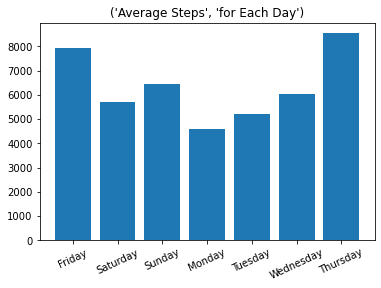

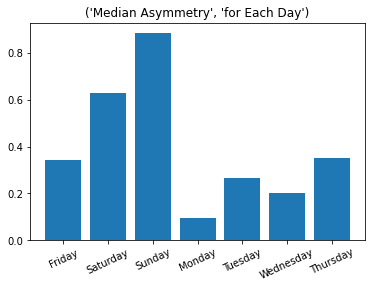

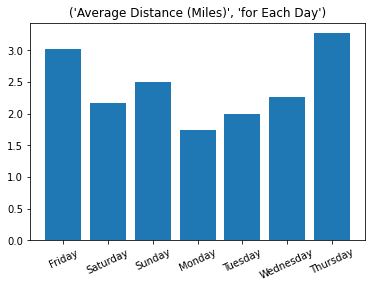

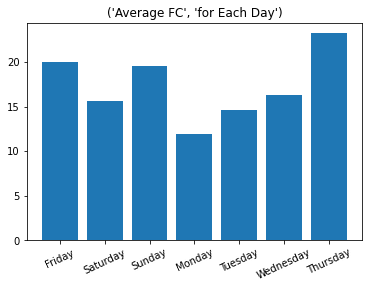

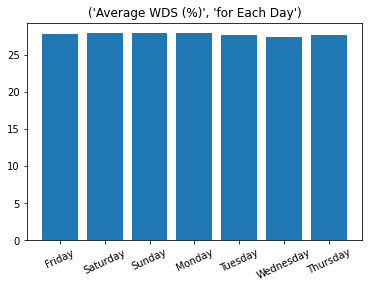

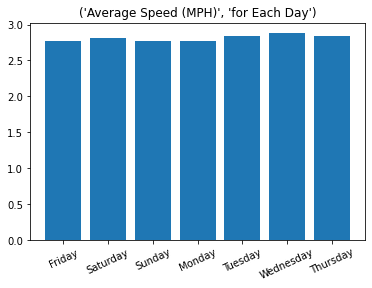

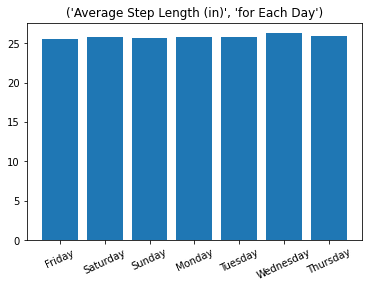

In [4]:
for column in averages:
    utils.bar_chart(averages.index, averages[column], title= (column, "for Each Day"))

print(averages)

### Interpreting the above graphs

* Largest differences for attributes are found in steps, distance, asymmetry, and flights climbed.

* Average steps are highest on Thursday, then Friday, then Sunday

* Distance and flights climbed follow the same pattern as average steps

* Median asymmetry was used rather than the average because of many outliers in the data and because the data set was relatively small

    * Asymmetry may be skewed due to having my phone in my pocket while skiing (typically skiied Friday, Saturday, Sunday)

* Walking double support (percentage of time where both feet are on the ground while moving) is roughly the same everyday (healthy walking patterns)

    * Healthy WDS is anywhere between 20 and 40 percent

* Average speed is similar everyday with a slightly higher average on Wednesdays and Thursdays

* Average step length was very similar with the exception of Wednesdays being the only day of the week with an average greater than 26 inches





### Hypothesis Testing
#### Is there a difference in the amount of activity on Monday vs Friday?

In [5]:
# weekend_df = pd.concat([friday_df, saturday_df])
# weekday_df = pd.concat([sunday_df, monday_df, tuesday_df, wednesday_df, thursday_df])

# taking first 12 instances of each daily df
short_monday_df = monday_df.iloc[0:12]
short_tuesday_df = tuesday_df.iloc[0:12]
short_wednesday_df = wednesday_df.iloc[0:12]
short_thursday_df = thursday_df.iloc[0:12]
short_friday_df = friday_df.iloc[0:12]
short_saturday_df = monday_df.iloc[0:12]
short_sunday_df = monday_df.iloc[0:12]

Above code used to shorten each dataframe to first 12 instances

In [6]:
xbar_monday = np.mean(short_monday_df)
xbar_friday = np.mean(short_friday_df)
s_monday = np.std(short_monday_df, ddof=1)
s_friday = np.std(short_friday_df, ddof=1)
n_monday = len(short_monday_df)
n_friday = len(short_friday_df)
df = n_monday + n_friday - 2

group_t_val, pval = stats.ttest_rel(short_monday_df["Steps"], short_friday_df["Steps"])
print("HYPO TEST FOR STEPS:")
utils.hypothesis_test(group_t_val, pval)
print()

group_t_val, pval = stats.ttest_rel(short_monday_df["FC"], short_friday_df["FC"])
print("HYPO TEST FOR FC:")
utils.hypothesis_test(group_t_val, pval)
print()
group_t_val, pval = stats.ttest_rel(short_monday_df["Distance"], short_friday_df["Distance"])
print("HYPO TEST FOR DISTANCE:")
utils.hypothesis_test(group_t_val, pval)

print()
group_t_val, pval = stats.ttest_rel(short_monday_df["WDS"], short_friday_df["WDS"])
print("HYPO TEST FOR WDS:")
utils.hypothesis_test(group_t_val, pval)

print()
group_t_val, pval = stats.ttest_rel(short_monday_df["Speed"], short_friday_df["Speed"])
print("HYPO TEST FOR SPEED:")
utils.hypothesis_test(group_t_val, pval)

print()
group_t_val, pval = stats.ttest_rel(short_monday_df["Step Length"], short_friday_df["Step Length"])
print("HYPO TEST FOR Step Length:")
utils.hypothesis_test(group_t_val, pval)


HYPO TEST FOR STEPS:
t: -1.9877567168004258 pval: 0.07230379965516731
do not reject H0

HYPO TEST FOR FC:
t: -1.4082459236262168 pval: 0.1866887267607727
do not reject H0

HYPO TEST FOR DISTANCE:
t: -1.9892493288581006 pval: 0.07211937586513437
do not reject H0

HYPO TEST FOR WDS:
t: 0.5105809276620137 pval: 0.6197347958475312
do not reject H0

HYPO TEST FOR SPEED:
t: 0.9269605360811277 pval: 0.3738383888836052
do not reject H0

HYPO TEST FOR Step Length:
t: 0.8806073481806738 pval: 0.397362472976457
do not reject H0


/Users/michael/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/michael/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


### Interpreting the Hypothesis Tests

* Null Hypotheses: monday averages $\neq$ friday averages 

* Results of the hypothesis tests show to reject the null hypothesis

* There is no significant difference between monday and friday averages

### KNN Classification for Monday

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

merged_data.dropna(inplace=True)
X = merged_data.drop(labels=["Date", "icon", "Day of Week", "temp", "tempmin", "tempmax", "windspeed"], axis=1) # 1 means column
y = merged_data["icon"]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

labels = preprocessing.LabelEncoder()
y_train = labels.fit_transform(y_train)

knn_clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_clf.fit(X_train, y_train)
y_predicted = knn_clf.predict(X_test)

print("y predicted:", y_predicted.tolist())
print("y actual:", y_test.tolist())
accuracy = knn_clf.score(X_test, y_test)
print("accuracy:", accuracy)



y predicted: [3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 2, 3, 2]
y actual: ['partly-cloudy-day', 'snow', 'partly-cloudy-day', 'snow', 'partly-cloudy-day', 'partly-cloudy-day', 'partly-cloudy-day', 'snow', 'partly-cloudy-day', 'rain', 'snow', 'rain', 'snow', 'partly-cloudy-day', 'snow', 'snow', 'clear-day', 'rain', 'partly-cloudy-day', 'snow', 'partly-cloudy-day', 'cloudy']
accuracy: 0.0


### Finding Correlation Between Attributes

In [23]:

corr_df = merged_data.corr()
corr_df.style.background_gradient(cmap='bwr').set_precision(2)

/var/folders/ff/8nt9fbfx16d1v9dbgs58k7_h0000gn/T/ipykernel_1718/3671719427.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_df.style.background_gradient(cmap='bwr').set_precision(2)


,tempmax,tempmin,temp,windspeed,Steps,FC,Distance,Asymmetry,WDS,Speed,Step Length
tempmax,1.00,0.80,0.95,0.31,-0.01,-0.17,-0.02,0.11,0.11,-0.04,0.16
tempmin,0.80,1.00,0.94,0.35,-0.02,-0.09,-0.04,0.06,-0.04,0.09,0.22
temp,0.95,0.94,1.00,0.38,-0.01,-0.14,-0.02,0.07,0.04,0.02,0.19
windspeed,0.31,0.35,0.38,1.00,-0.10,-0.11,-0.12,0.01,0.16,-0.11,-0.02
Steps,-0.01,-0.02,-0.01,-0.10,1.00,0.79,1.00,-0.27,-0.21,0.23,0.19
FC,-0.17,-0.09,-0.14,-0.11,0.79,1.00,0.80,-0.20,-0.13,0.17,0.08
Distance,-0.02,-0.04,-0.02,-0.12,1.00,0.80,1.00,-0.27,-0.20,0.23,0.19
Asymmetry,0.11,0.06,0.07,0.01,-0.27,-0.20,-0.27,1.00,0.23,-0.17,0.03
WDS,0.11,-0.04,0.04,0.16,-0.21,-0.13,-0.20,0.23,1.00,-0.84,-0.71
Speed,-0.04,0.09,0.02,-0.11,0.23,0.17,0.23,-0.17,-0.84,1.00,0.76


### Interpreting the Correlation Chart

* Main Takeaways

    * Temperature does not affect the number of steps taken per day

    * Small correlation between distance and speed

    * Strong correlation between speed and step length... as speed increased, so did step length

# Classification Results

* 3.a. Trying to predict the icon that was shown in the weather app from the health data
    
    *3.a.i Distribution of class labels needs to be interpreted

* 3.b. My hypothesis is that there would be little to no difference between what icon was shown and the amount of actvitity that was tracked that day

* 3.c. I evaluated the performance of KNN by the accuracy displayed.

* 3.d. I would have liked to classify the temperature based on the data, but since data is numeric I could not classify it.

# Conclusion

* 4.a. The data set included Spokane weather data as well as health data recorded from my iPhone

* 4.b. My classifier is a work in progress still but it attempts to determine what icon was shown on the weather app for each day based on my walking activity.

* 4.c. Potential impacts of my work could include uncovering unhealthy walking habits for people (WDS, Asymmetry). I was not able to recognize any ethical issues with my work as it does not dive deep into the privacy of the user.